In [ ]:
This project analyzes a mental-health social media dataset (5,000 records) to understand how digital behaviors, lifestyle patterns, and social interactions correlate with mental health outcomes. 
The workflow includes data cleaning, exploratory data analysis (EDA), feature engineering, model building, and evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mental_health_social_media_dataset.csv')
df.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [3]:
df['date']=pd.to_datetime(df['date'])

In [4]:
df.tail()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
4995,Sai Menon,42,2025-01-21,Female,WhatsApp,254,64,0,1,7.7,35,1,5,7,At_Risk
4996,Neha Ansari,33,2025-01-26,Female,TikTok,330,214,1,2,7.4,27,3,7,6,Stressed
4997,Aarav Sharma,13,2025-02-06,Male,TikTok,403,262,2,2,7.0,20,4,9,4,Stressed
4998,Aadhya Patil,21,2025-02-17,Male,TikTok,476,309,2,3,6.6,12,4,9,4,Stressed
4999,Shaurya Das,42,2025-02-28,Female,TikTok,249,162,1,1,7.8,35,2,6,6,Stressed


In [5]:
df.drop('person_name', axis=1, inplace=True)

In [6]:
df.shape

(5000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   age                          5000 non-null   int64         
 1   date                         5000 non-null   datetime64[ns]
 2   gender                       5000 non-null   object        
 3   platform                     5000 non-null   object        
 4   daily_screen_time_min        5000 non-null   int64         
 5   social_media_time_min        5000 non-null   int64         
 6   negative_interactions_count  5000 non-null   int64         
 7   positive_interactions_count  5000 non-null   int64         
 8   sleep_hours                  5000 non-null   float64       
 9   physical_activity_min        5000 non-null   int64         
 10  anxiety_level                5000 non-null   int64         
 11  stress_level                 5000 non-null 

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
age,5000.0,NaN,NaN,NaN,29.9478,13.0,21.0,27.0,35.25,69.0,12.279936
date,5000,NaN,NaN,NaN,2024-12-09 06:35:08.160000256,2024-01-01 00:00:00,2024-06-23 00:00:00,2024-12-09 00:00:00,2025-05-30 00:00:00,2025-11-16 00:00:00,NaN
gender,5000,3,Female,2474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,5000,7,Facebook,744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daily_screen_time_min,5000.0,NaN,NaN,NaN,373.0582,140.0,310.0,388.0,461.0,520.0,106.003916
social_media_time_min,5000.0,NaN,NaN,NaN,175.3316,35.0,118.0,170.0,231.0,338.0,71.209329
negative_interactions_count,5000.0,NaN,NaN,NaN,0.8642,0.0,1.0,1.0,1.0,2.0,0.555176
positive_interactions_count,5000.0,NaN,NaN,NaN,1.8354,0.0,1.0,2.0,2.0,4.0,0.943443
sleep_hours,5000.0,NaN,NaN,NaN,7.13466,6.4,6.7,7.1,7.45,8.3,0.533184
physical_activity_min,5000.0,NaN,NaN,NaN,22.6934,8.0,14.0,21.0,29.0,46.0,10.602862


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

age                            0
date                           0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
physical_activity_min          0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
dtype: int64

In [11]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

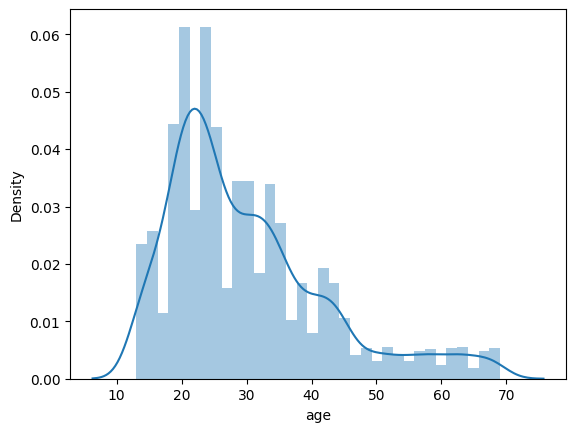

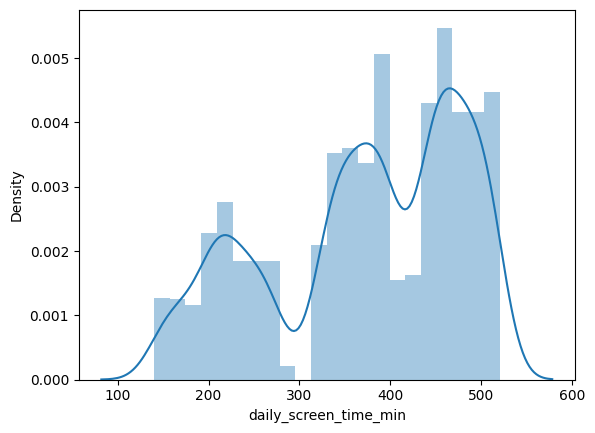

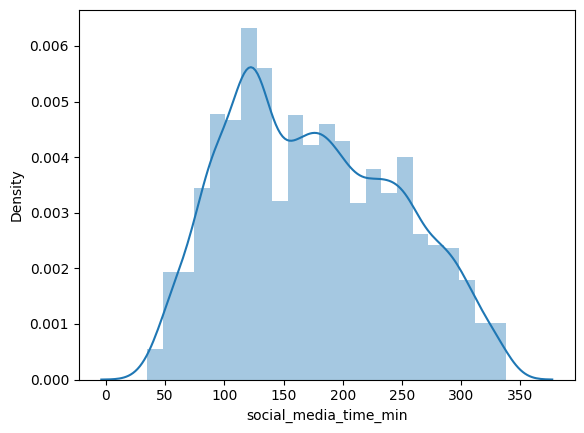

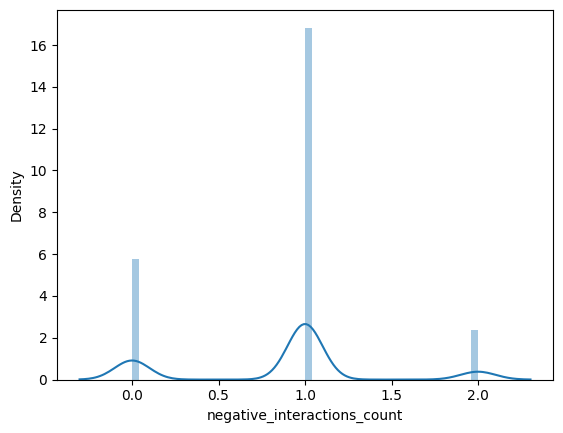

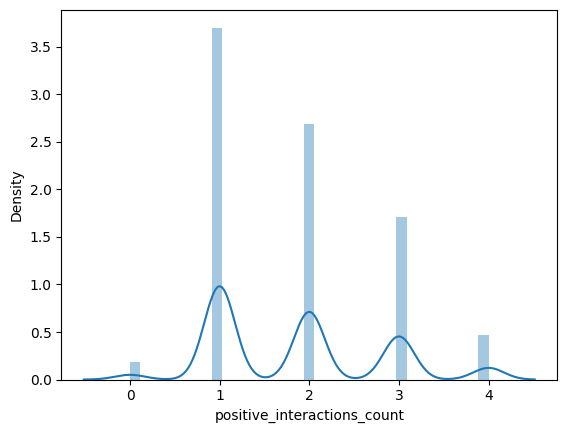

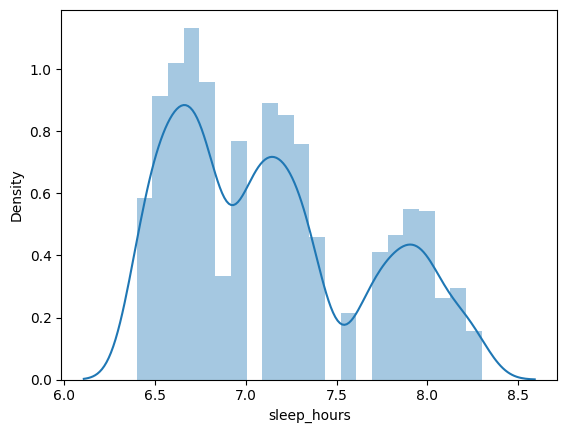

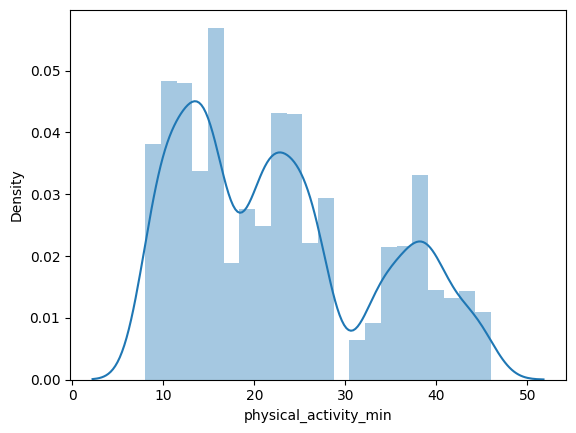

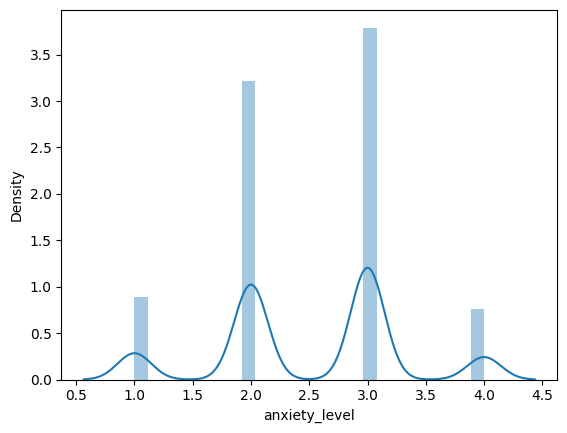

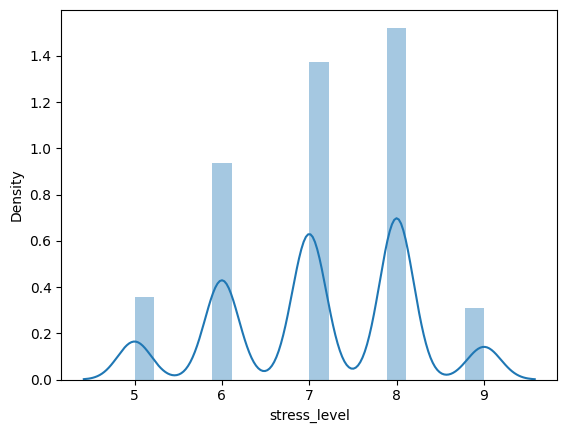

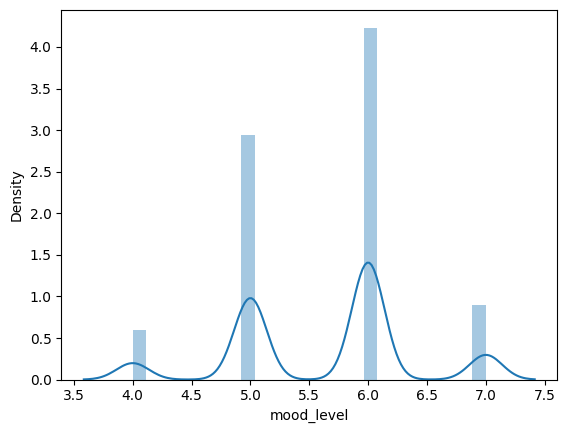

In [12]:
for i in list(df.select_dtypes(include=['int64','float64']).columns):
    distplots(i)

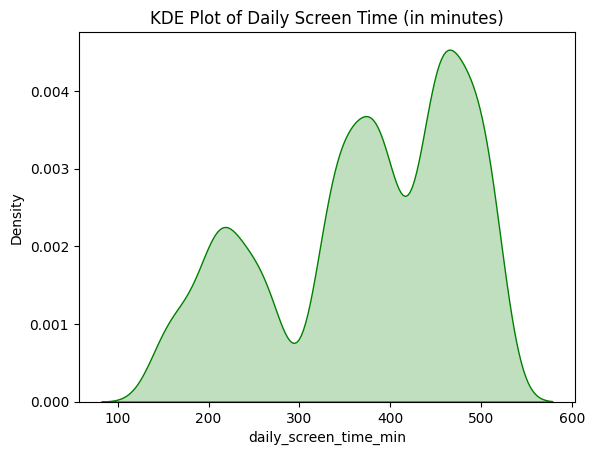

In [13]:
sns.kdeplot(df['daily_screen_time_min'], fill=True, color='green')
plt.title('KDE Plot of Daily Screen Time (in minutes)')
plt.show()

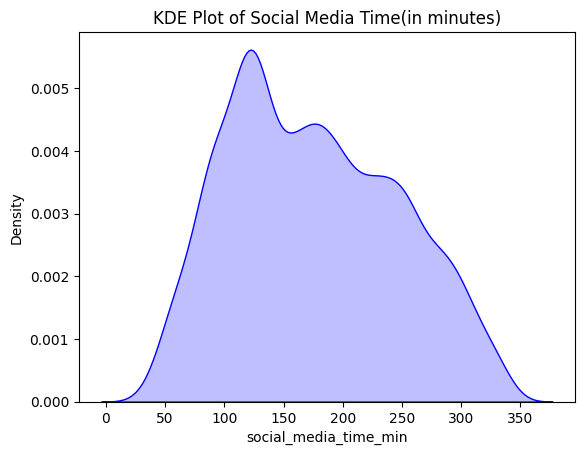

In [14]:
sns.kdeplot(df['social_media_time_min'], fill=True, color='blue')
plt.title('KDE Plot of Social Media Time(in minutes)')
plt.show()

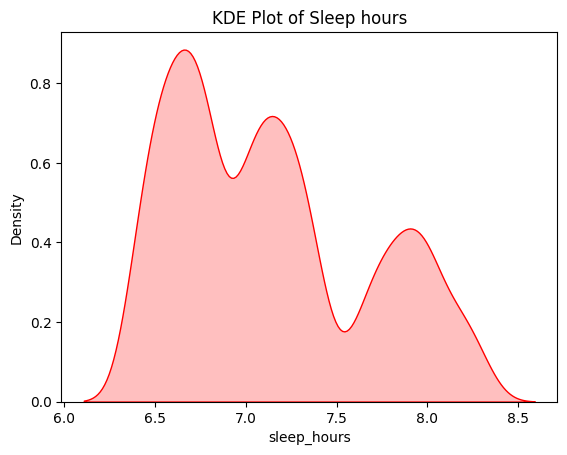

In [15]:
sns.kdeplot(df['sleep_hours'], fill=True, color='red')
plt.title('KDE Plot of Sleep hours')
plt.show()

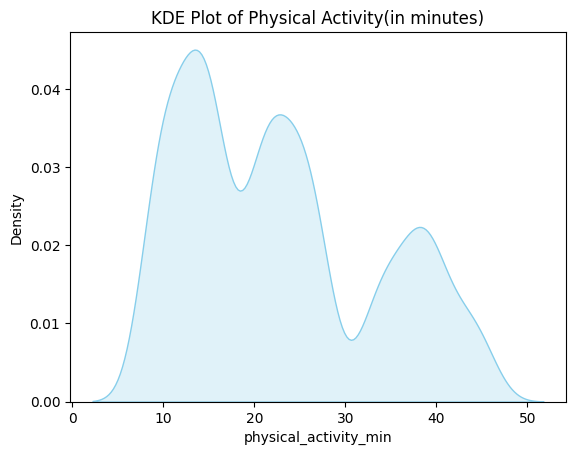

In [16]:
sns.kdeplot(df['physical_activity_min'], fill=True, color='skyblue')
plt.title('KDE Plot of Physical Activity(in minutes)')
plt.show()

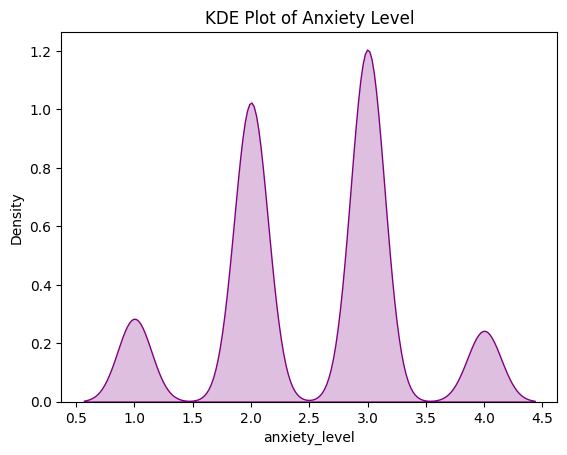

In [17]:
sns.kdeplot(df['anxiety_level'], fill=True, color='purple')
plt.title('KDE Plot of Anxiety Level')
plt.show()

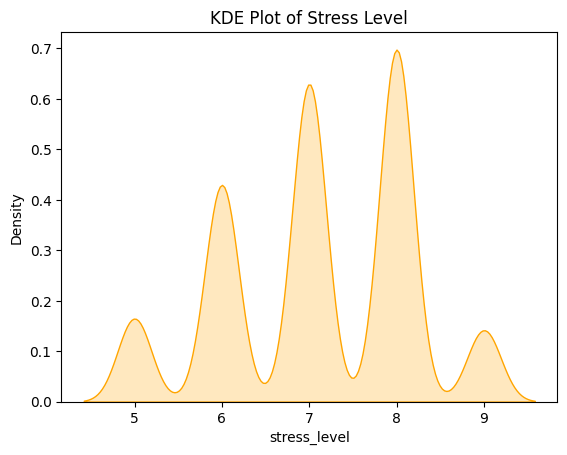

In [18]:
sns.kdeplot(df['stress_level'], fill=True, color='orange')
plt.title('KDE Plot of Stress Level')
plt.show()

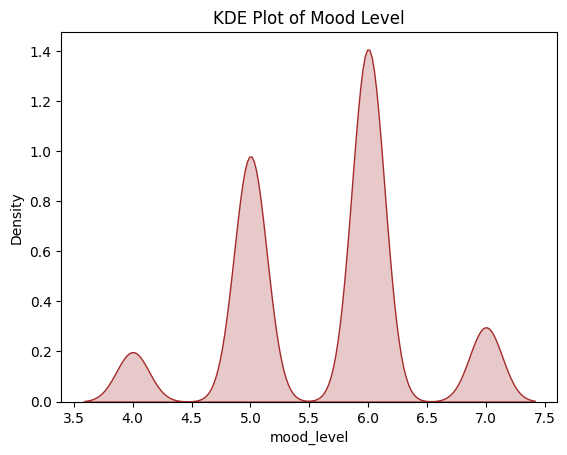

In [19]:
sns.kdeplot(df['mood_level'], fill=True, color='brown')
plt.title('KDE Plot of Mood Level')
plt.show()

In [20]:
df['gender'].value_counts()

gender
Female    2474
Male      2427
Other       99
Name: count, dtype: int64

In [21]:
df['platform'].value_counts()

platform
Facebook     744
TikTok       723
YouTube      716
WhatsApp     710
Snapchat     705
Instagram    703
Twitter      699
Name: count, dtype: int64

In [22]:
df['mental_state'].value_counts()

mental_state
Stressed    4601
Healthy      341
At_Risk       58
Name: count, dtype: int64

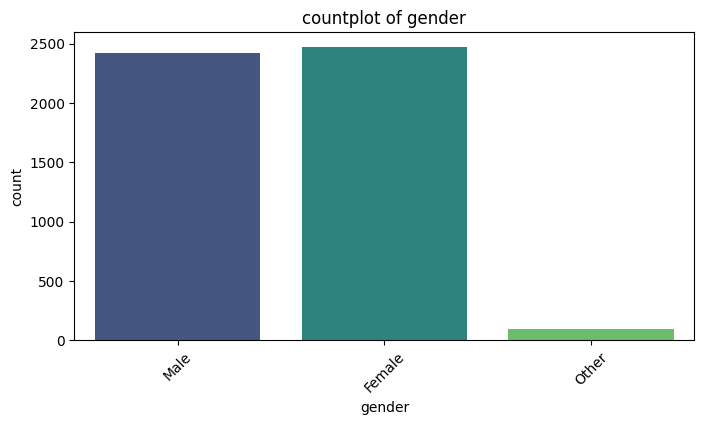

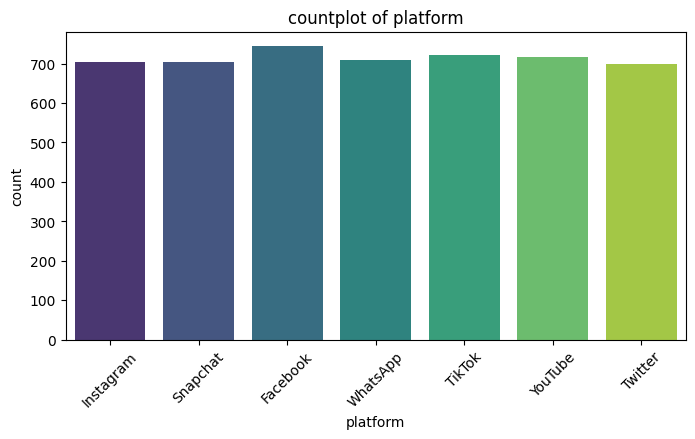

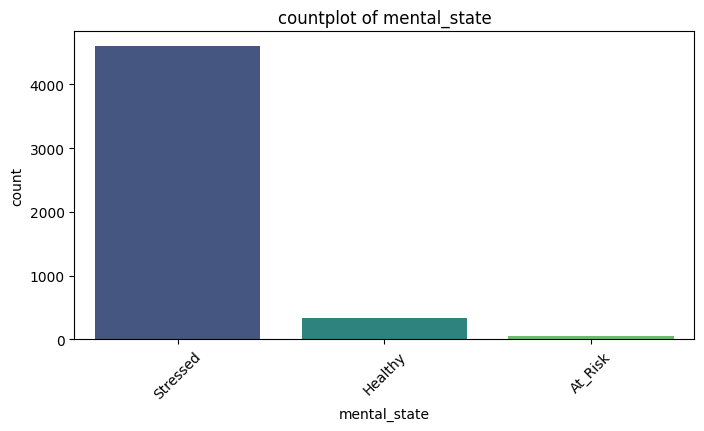

In [23]:
for col in ['gender', 'platform', 'mental_state']:
    plt.figure(figsize=(8,4))
    sns.countplot(df, x=col, palette='viridis')
    plt.title(f'countplot of {col}')
    plt.xticks(rotation=45)
    
plt.show()

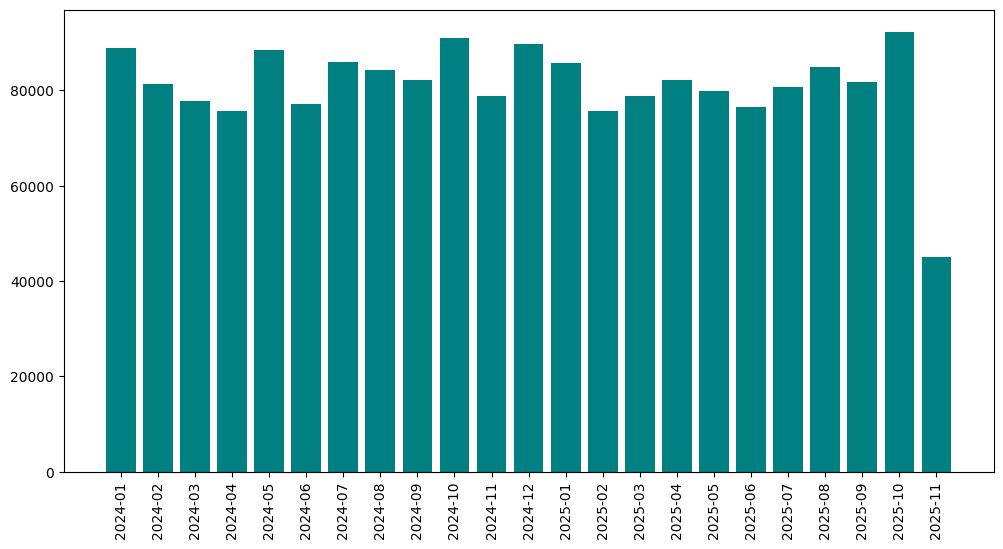

In [24]:
plt.figure(figsize=(12,6))
screen_time=df.groupby(df['date'].dt.to_period('M'))['daily_screen_time_min'].sum()
plt.bar(screen_time.index.astype(str), screen_time.values, color='teal')
plt.xticks(rotation=90)
plt.show()


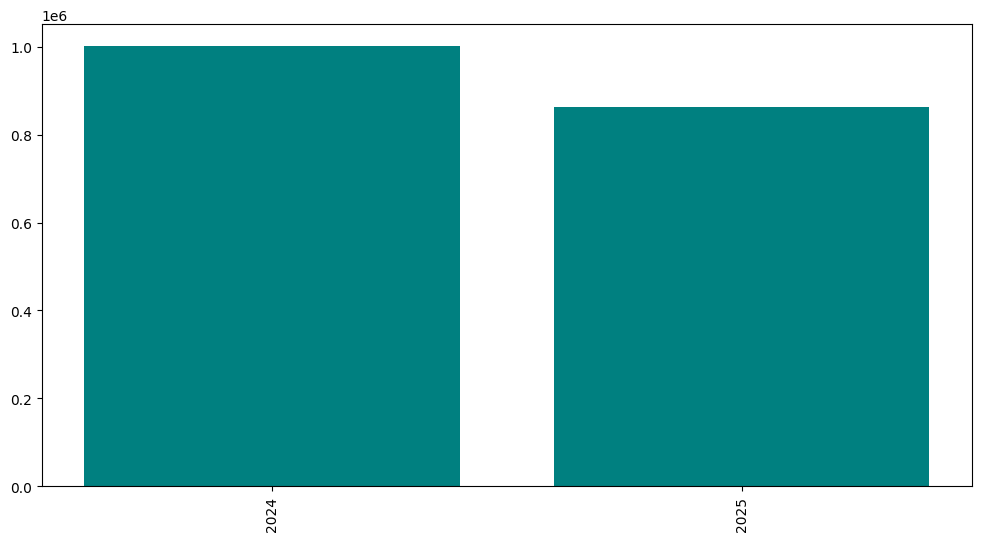

In [25]:
plt.figure(figsize=(12,6))
screen_time=df.groupby(df['date'].dt.to_period('Y'))['daily_screen_time_min'].sum()
plt.bar(screen_time.index.astype(str), screen_time.values, color='teal')
plt.xticks(rotation=90)
plt.show()


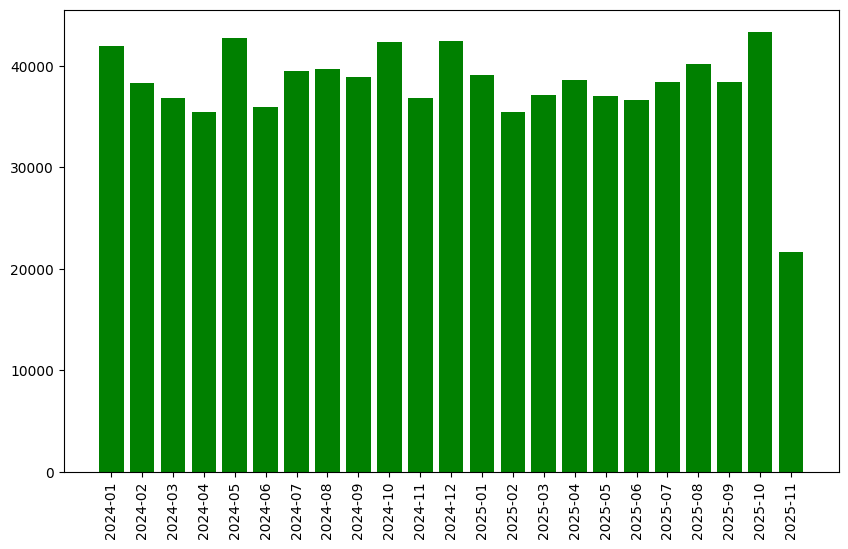

In [26]:
plt.figure(figsize=(10,6))
social_time=df.groupby(df['date'].dt.to_period('M'))['social_media_time_min'].sum()
plt.bar(social_time.index.astype(str), social_time.values, color='green')
plt.xticks(rotation=90)
plt.show()

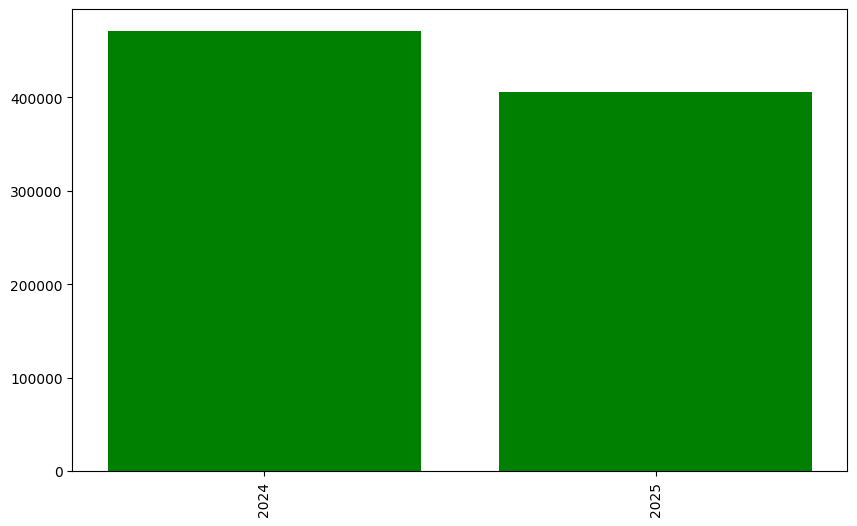

In [27]:
plt.figure(figsize=(10,6))
social_time=df.groupby(df['date'].dt.to_period('Y'))['social_media_time_min'].sum()
plt.bar(social_time.index.astype(str), social_time.values, color='green')
plt.xticks(rotation=90)
plt.show()

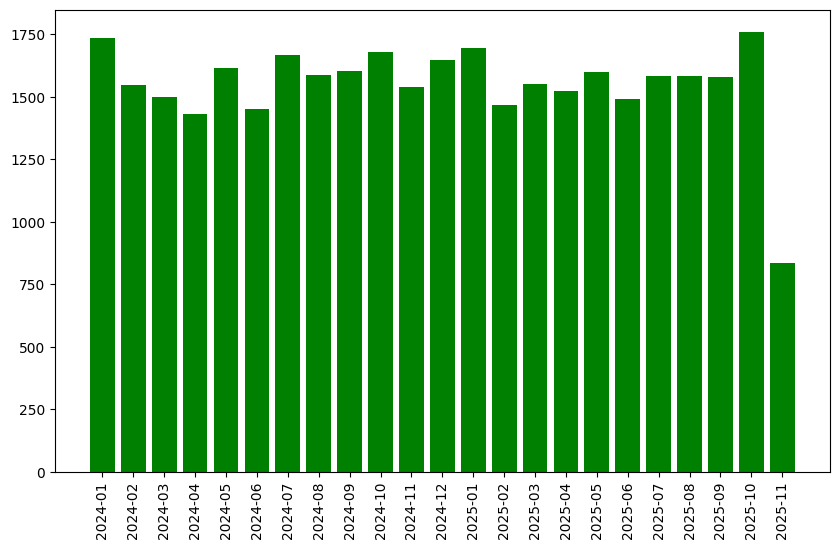

In [28]:
plt.figure(figsize=(10,6))
sleep_hours=df.groupby(df['date'].dt.to_period('M'))['sleep_hours'].sum()
plt.bar(sleep_hours.index.astype(str), sleep_hours.values, color='green')
plt.xticks(rotation=90)
plt.show()

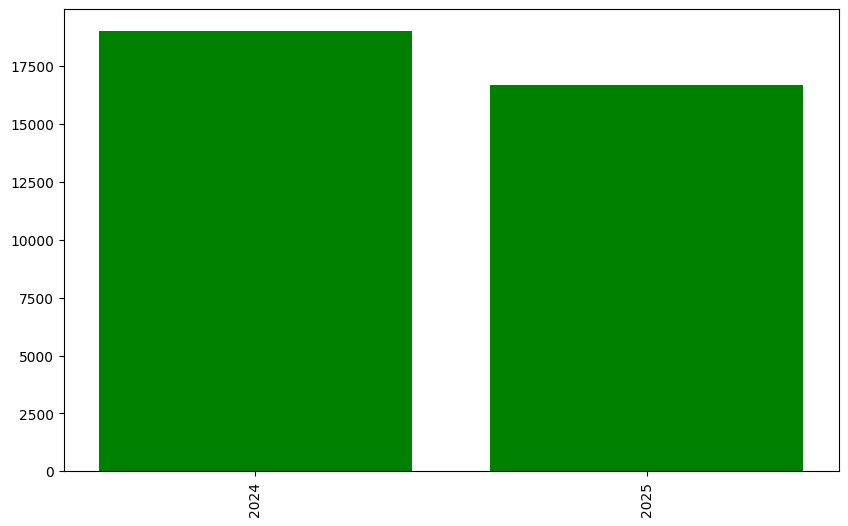

In [29]:
plt.figure(figsize=(10,6))
sleep_hours=df.groupby(df['date'].dt.to_period('Y'))['sleep_hours'].sum()
plt.bar(sleep_hours.index.astype(str), sleep_hours.values, color='green')
plt.xticks(rotation=90)
plt.show()

In [30]:
from sklearn.preprocessing import OrdinalEncoder
categories_order=[['Healthy', 'At_Risk', 'Stressed']]
encoder=OrdinalEncoder(categories=categories_order)
df['mental_state_encoded']=encoder.fit_transform(df[['mental_state']]).astype(int)
df.drop('mental_state', axis=1, inplace=True)
df.head()

,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state_encoded
0,35,2024-01-01,Male,Instagram,320,160,1,2,7.4,28,2,7,6,2
1,24,2024-01-12,Female,Instagram,453,226,1,3,6.7,15,3,8,5,2
2,26,2024-01-06,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,2
3,66,2024-01-17,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,2
4,31,2024-01-28,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,2


In [31]:
encode_gender=pd.get_dummies(df[['gender','platform']], prefix='gender', dtype=int)
df_encoded=pd.concat([df, encode_gender], axis=1)
df_encoded=df_encoded.drop(columns={'gender', 'platform'}, axis=1)
df_encoded.head()

,age,date,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,...,gender_Female,gender_Male,gender_Other,gender_Facebook,gender_Instagram,gender_Snapchat,gender_TikTok,gender_Twitter,gender_WhatsApp,gender_YouTube
0,35,2024-01-01,320,160,1,2,7.4,28,2,7,...,0,1,0,0,1,0,0,0,0,0
1,24,2024-01-12,453,226,1,3,6.7,15,3,8,...,1,0,0,0,1,0,0,0,0,0
2,26,2024-01-06,357,196,1,2,7.2,24,3,7,...,0,1,0,0,0,1,0,0,0,0
3,66,2024-01-17,190,105,0,1,8.0,41,2,6,...,1,0,0,0,0,1,0,0,0,0
4,31,2024-01-28,383,211,1,2,7.1,22,3,7,...,0,1,0,0,0,1,0,0,0,0


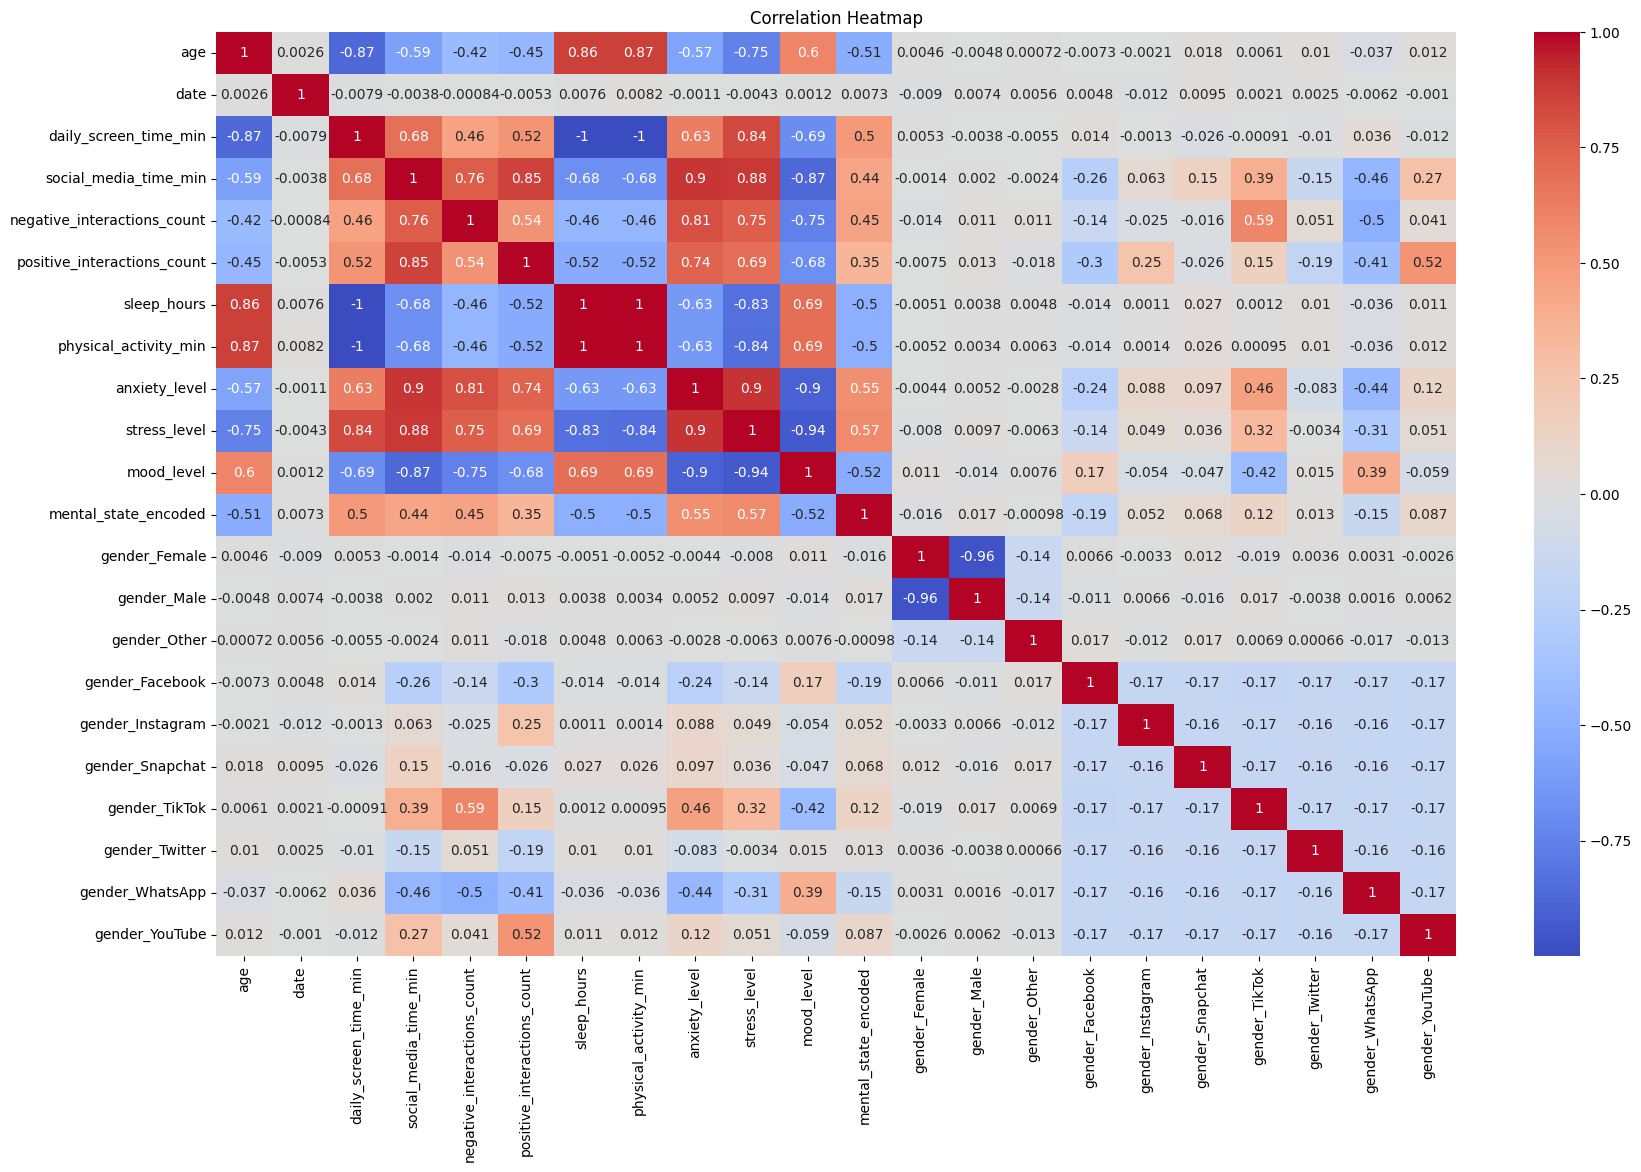

In [32]:
plt.figure(figsize=(20,12))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
x=df_encoded.drop(columns={'mental_state_encoded', 'date'}, axis=1)
y=df_encoded['mental_state_encoded']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=4)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
yhat_train_dtc=dtc.predict(x_train)
yhat_test_dtc=dtc.predict(x_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [39]:
print(classification_report(y_train, yhat_train_dtc))
print()
print(classification_report(y_test, yhat_test_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00      3686

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [40]:
print(confusion_matrix(y_train, yhat_train_dtc))
print()
print(confusion_matrix(y_test, yhat_test_dtc))

[[ 264    0    0]
 [   0   50    0]
 [   0    0 3686]]

[[ 77   0   0]
 [  0   8   0]
 [  0   0 915]]


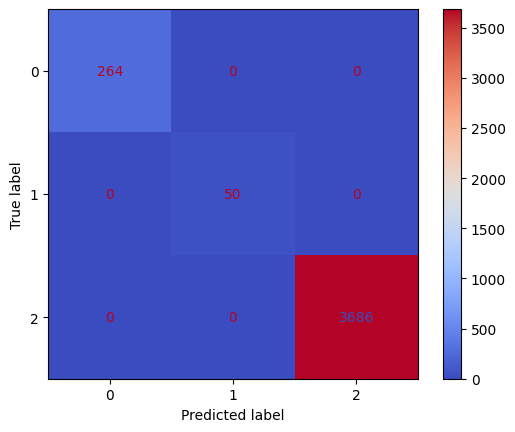

In [41]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_dtc, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

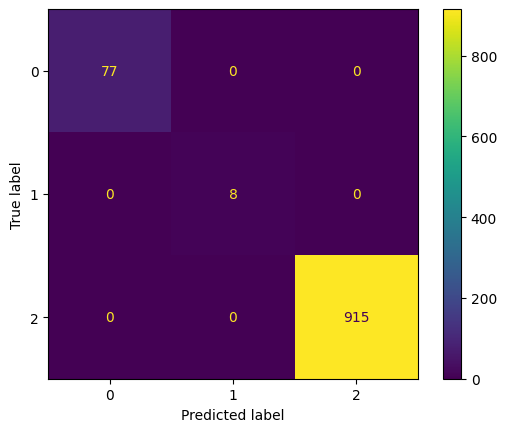

In [42]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_dtc, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
yhat_train_lreg=lreg.predict(x_train)
yhat_test_lreg=lreg.predict(x_test)

In [45]:
print(classification_report(y_train, yhat_train_lreg))
print()
print(classification_report(y_test, yhat_test_lreg))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       264
           1       0.98      0.88      0.93        50
           2       1.00      1.00      1.00      3686

    accuracy                           1.00      4000
   macro avg       0.99      0.96      0.97      4000
weighted avg       1.00      1.00      1.00      4000


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        77
           1       0.88      0.88      0.88         8
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       1.00      1.00      1.00      1000



In [46]:
print(confusion_matrix(y_train, yhat_train_lreg))
print()
print(confusion_matrix(y_test, yhat_test_lreg))

[[ 263    1    0]
 [   6   44    0]
 [   0    0 3686]]

[[ 76   1   0]
 [  1   7   0]
 [  0   0 915]]


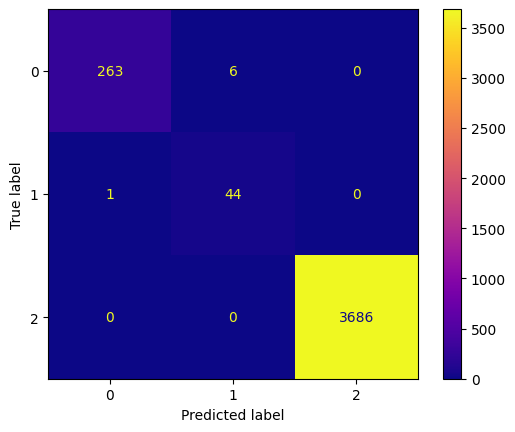

In [47]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_lreg, y_train))
c_matrix.plot(cmap='plasma')
plt.show()

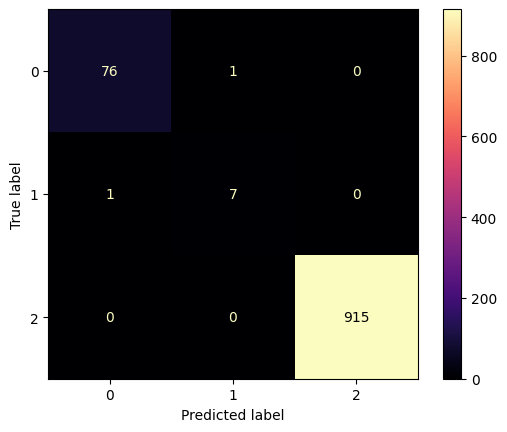

In [48]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_lreg, y_test))
c_matrix.plot(cmap='magma')
plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
yhat_train_rfc=rfc.predict(x_train)
yhat_test_rfc=rfc.predict(x_test)

In [51]:
print(classification_report(y_train, yhat_train_rfc))
print()
print(classification_report(y_test, yhat_test_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00      3686

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [52]:
print(confusion_matrix(y_train, yhat_train_rfc))
print()
print(confusion_matrix(y_test, yhat_test_rfc))

[[ 264    0    0]
 [   0   50    0]
 [   0    0 3686]]

[[ 77   0   0]
 [  0   8   0]
 [  0   0 915]]


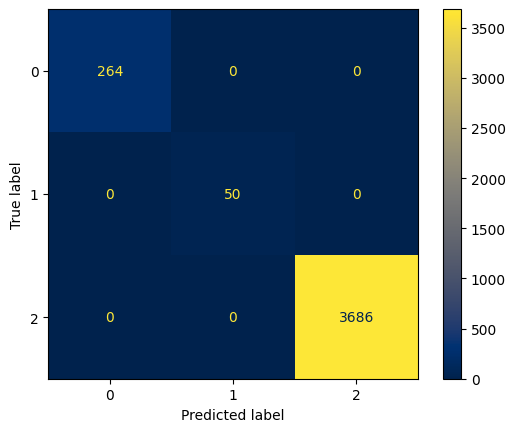

In [53]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_rfc, y_train))
c_matrix.plot(cmap='cividis')
plt.show()

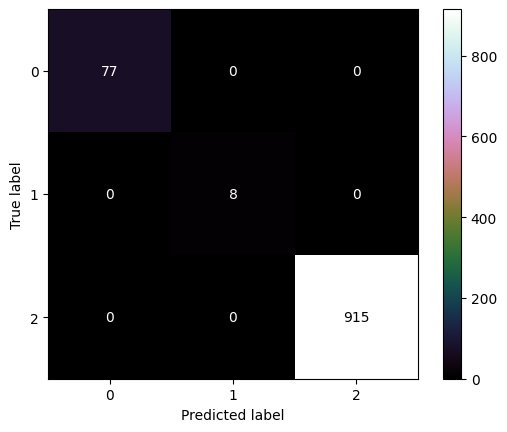

In [54]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_rfc, y_test))
c_matrix.plot(cmap='cubehelix')
plt.show()

In [55]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [56]:
yhat_train_gnb=gnb.predict(x_train)
yhat_test_gnb=gnb.predict(x_test)

In [57]:
print(classification_report(y_train, yhat_train_gnb))
print()
print(classification_report(y_test, yhat_test_gnb))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       264
           1       0.49      1.00      0.65        50
           2       1.00      1.00      1.00      3686

    accuracy                           0.99      4000
   macro avg       0.83      0.93      0.85      4000
weighted avg       0.99      0.99      0.99      4000


              precision    recall  f1-score   support

           0       1.00      0.78      0.88        77
           1       0.32      1.00      0.48         8
           2       1.00      1.00      1.00       915

    accuracy                           0.98      1000
   macro avg       0.77      0.93      0.79      1000
weighted avg       0.99      0.98      0.99      1000



In [58]:
print(confusion_matrix(y_train, yhat_train_gnb))
print()
print(confusion_matrix(y_test, yhat_test_gnb))

[[ 211   53    0]
 [   0   50    0]
 [   0    0 3686]]

[[ 60  17   0]
 [  0   8   0]
 [  0   0 915]]


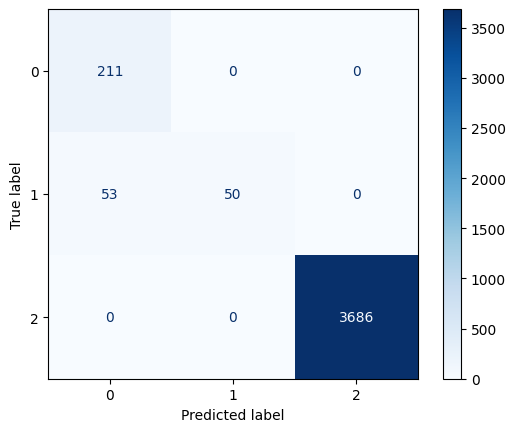

In [59]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_gnb, y_train))
c_matrix.plot(cmap='Blues')
plt.show()

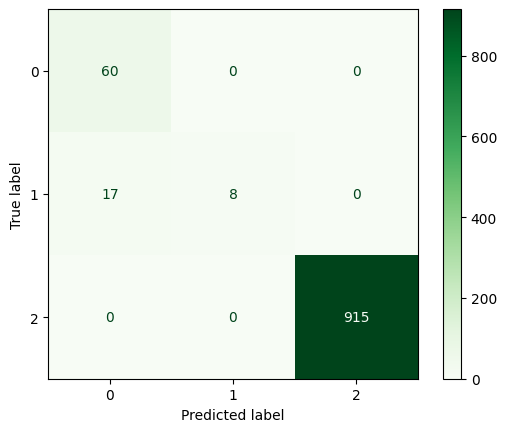

In [60]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_gnb, y_test))
c_matrix.plot(cmap='Greens')
plt.show()

In [61]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [62]:
yhat_train_svc=svc.predict(x_train)
yhat_test_svc=svc.predict(x_test)

In [63]:
print(classification_report(y_train, yhat_train_svc))
print()
print(classification_report(y_test, yhat_test_svc))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       264
           1       0.70      0.64      0.67        50
           2       1.00      1.00      1.00      3686

    accuracy                           0.99      4000
   macro avg       0.88      0.86      0.87      4000
weighted avg       0.99      0.99      0.99      4000


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        77
           1       0.67      0.50      0.57         8
           2       1.00      1.00      1.00       915

    accuracy                           0.99      1000
   macro avg       0.87      0.82      0.84      1000
weighted avg       0.99      0.99      0.99      1000



In [64]:
print(confusion_matrix(y_train, yhat_train_svc))
print()
print(confusion_matrix(y_test, yhat_test_svc))

[[ 250   14    0]
 [  18   32    0]
 [   0    0 3686]]

[[ 75   2   0]
 [  4   4   0]
 [  0   0 915]]


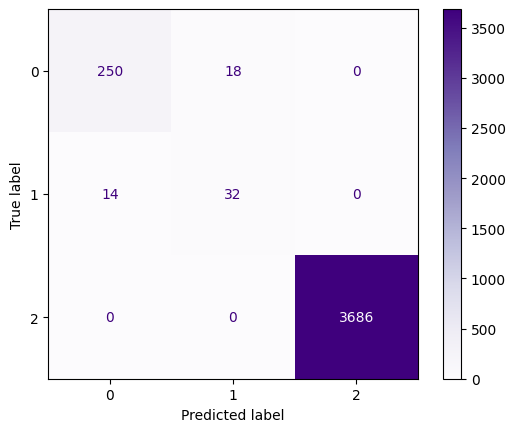

In [65]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_svc, y_train))
c_matrix.plot(cmap='Purples')
plt.show()

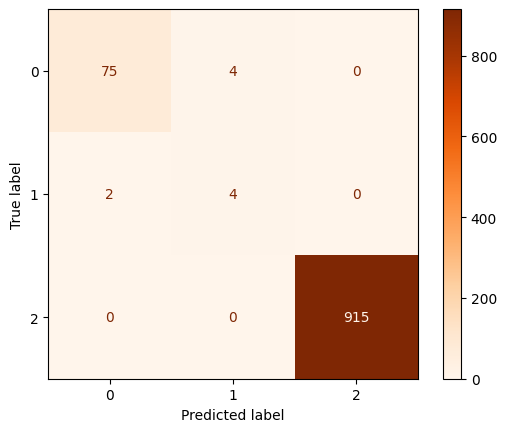

In [66]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_svc, y_test))
c_matrix.plot(cmap='Oranges')
plt.show()

In [67]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [68]:
yhat_train_xgb=xgb.predict(x_train)
yhat_test_xgb=xgb.predict(x_test)

In [69]:
print(classification_report(y_train, yhat_train_xgb))
print()
print(classification_report(y_test, yhat_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00      3686

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [70]:
print(confusion_matrix(y_train, yhat_train_xgb))
print()
print(confusion_matrix(y_test, yhat_test_xgb))

[[ 264    0    0]
 [   0   50    0]
 [   0    0 3686]]

[[ 77   0   0]
 [  0   8   0]
 [  0   0 915]]


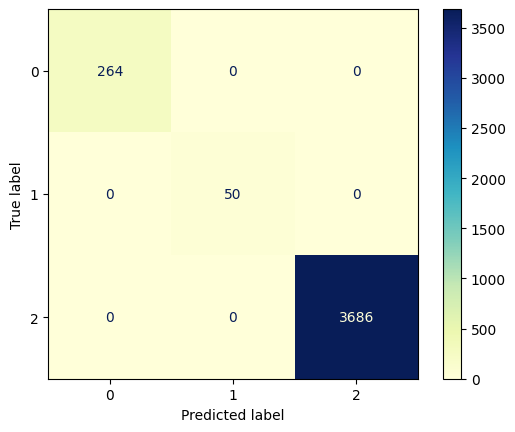

In [71]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_xgb, y_train))
c_matrix.plot(cmap='YlGnBu')
plt.show()

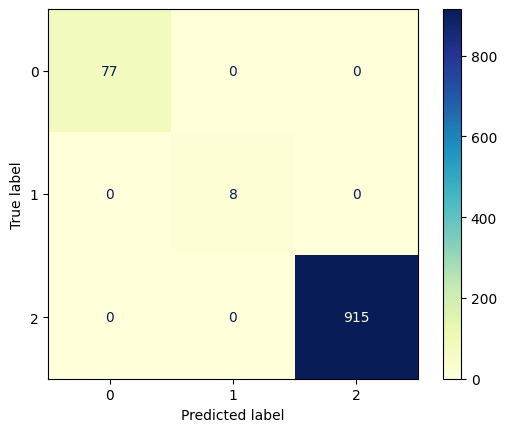

In [72]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_xgb, y_test))
c_matrix.plot(cmap='YlGnBu')
plt.show()

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [74]:
yhat_train_knn=knn.predict(x_train)
yhat_test_knn=knn.predict(x_test)

In [75]:
print(classification_report(y_train, yhat_train_knn))
print()
print(classification_report(y_test, yhat_test_knn))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       264
           1       0.87      0.82      0.85        50
           2       1.00      1.00      1.00      3686

    accuracy                           1.00      4000
   macro avg       0.95      0.93      0.94      4000
weighted avg       1.00      1.00      1.00      4000


              precision    recall  f1-score   support

           0       0.99      0.95      0.97        77
           1       0.78      0.88      0.82         8
           2       1.00      1.00      1.00       915

    accuracy                           0.99      1000
   macro avg       0.92      0.94      0.93      1000
weighted avg       1.00      0.99      1.00      1000



In [76]:
print(confusion_matrix(y_train, yhat_train_knn))
print()
print(confusion_matrix(y_test, yhat_test_knn))

[[ 256    6    2]
 [   9   41    0]
 [   0    0 3686]]

[[ 73   2   2]
 [  1   7   0]
 [  0   0 915]]


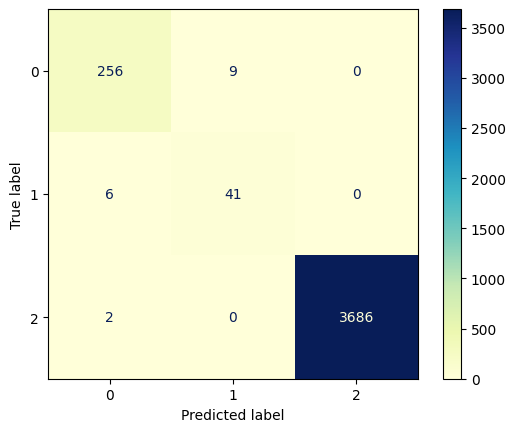

In [77]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_knn, y_train))
c_matrix.plot(cmap='YlGnBu')
plt.show()

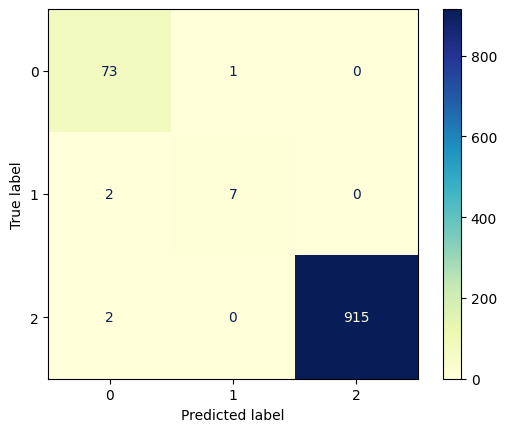

In [78]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_knn, y_test))
c_matrix.plot(cmap='YlGnBu')
plt.show()

HYPERPARAMETER TUNING

In [80]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rfc = RandomForestClassifier()

grid = GridSearchCV(rfc, params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 1.0


In [ ]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

